<a href="https://colab.research.google.com/github/sunjinnn/Blockchain2025/blob/main/25_09_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 27.29722222 454.09722222]


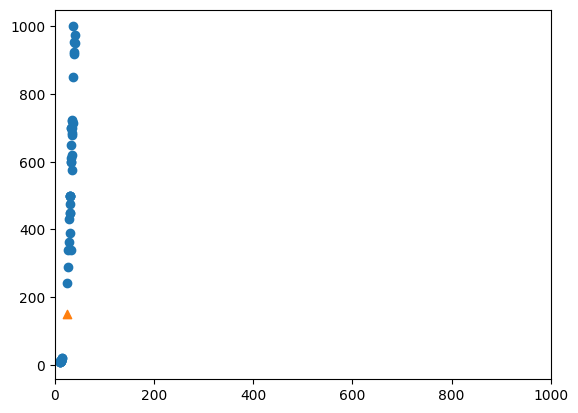

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier #구글에서 제공하고 있는 인공지
from sklearn.model_selection import train_test_split

kn = KNeighborsClassifier(n_neighbors=5)

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = np.column_stack((length, weight))
fish_target = [1]*35 + [0]*14  # ← 수정됨 (총 25개)

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

#kn.fit(train_input, train_target)
#print(kn.score(test_input, test_target))
#print(kn.predict([[25, 150]]))
mean=np.mean(train_input, axis=0)
std=np.std(train_input, axis=0)
train_scaled=(train_input-mean)/std

print(mean)

kn.fit(train_scaled, train_target)
new=([25,150] - mean) / std
kn.predict([new])

plt.scatter(length, weight)
plt.scatter([25], [150], marker='^')
plt.xlim((0,1000)) #x축을 0부터 1000까지로 변경
plt.show()


9/18

처음 스코어는 0.0 그 다음 스코어는 1.0 => 이게 바로 정확도

훈련세트: 훈련(학습)에 사용되는 데이터
테스트세트: 평가에 사용되는 데이터
샘플링 편향: 훈련세트에 샘플이 골고루 섞이지 않는 경우
-데이터가 많이 있을 때 적절한 분포를 가지고 들어와야 하는데

적절한 비율로 돔과 빙어 데이터를 가지고 학습을 하고 테스트를 해야 적당한 거임

데이터편향 !! 윤리적인 판단이 필요한 부분이다

훈련을 75% 테스트를 25%로 나눠서 진행 (49개의 데이터 중)
나눌 때 무슨 기준으로 나누지?
-> 타겟이 잘 섞이도록 75% 안에 빙어와 돔이 들어가야하는데 34:15의 비율로 들어가게 됨. (타겟을 가지고 기준을 정해라 라고 했으니까)
fish_target대로 데이터를 가져오자?

어떤 수를 리턴하는 알고리즘에서 같은 숫자가 나오는데 '초'를 넣게되면 훈련셋을 예시로 35:14의 비율로 항상 다른 걸 들고와서 다른 결과가 나옴 그래서 고정을 해버리면 학습데이터는 항상 같은 데이터를 가져오기 때문에 공부하기가 편하다 random_stat=42

1g과 1cm에 대해 두 개의 차이를 확실히 잡아줘야할 거 같은?

두 특성의 스케일과 데이터를 표현하는 기준이 다르다

아놔 표준점수?? = (특성값-평균)/표준편차

train_input, test_input만 스케일링하면 된다?
